<a href="https://colab.research.google.com/github/LTRibeiros/AnaliseDeDados_Python/blob/main/regressao_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSÃO LINEAR MÚLTIPLA**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
enem = pd.read_csv('/content/drive/MyDrive/enem_2019_tratado.csv',
                    sep=',', encoding='iso-8859-1')

## **ANÁLISE INICIAL**

In [13]:
enem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [11]:
enem.shape

(499940, 1)

**Objetivo: Criar um modelo matemático de regressão linear múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

**Selecionando apenas um dos colégios**

In [14]:
colegiox = enem.loc[enem.CO_ESCOLA == 35132287]

In [15]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [ ]:
colegiox.shape

**Valores Missing**

In [16]:
colegiox.isnull().sum()

,0
NU_INSCRICAO,0
NO_MUNICIPIO_RESIDENCIA,0
IDADE,0
SEXO,0
TP_ESTADO_CIVIL,0
RACA,0
TP_NACIONALIDADE,0
TP_ST_CONCLUSAO,0
ESCOLA,0
CO_ESCOLA,0


In [17]:
# Análise dos tipos de atributos.
colegiox.dtypes

,0
NU_INSCRICAO,object
NO_MUNICIPIO_RESIDENCIA,object
IDADE,int64
SEXO,object
TP_ESTADO_CIVIL,int64
RACA,object
TP_NACIONALIDADE,int64
TP_ST_CONCLUSAO,int64
ESCOLA,object
CO_ESCOLA,float64


## **REGRESSÃO MÚLTIPLA COM STATSMODELS**

## **MODELO 1**

In [18]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [19]:
# Criação do modelo
modelo1 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data = colegiox).fit()

In [20]:
residuos = modelo1.resid
residuos

,0
17,-4.498054
10760,33.309358
13315,-5.718021
20006,-26.432059
26697,1.349594
...,...
426829,35.760528
428241,-17.683137
443242,-17.497499
462446,-56.783460


### Teste de Normalidade dos resíduos

In [21]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [22]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847339466949809
p-valor: 0.15435337312320357


In [23]:
import matplotlib.pyplot as plt

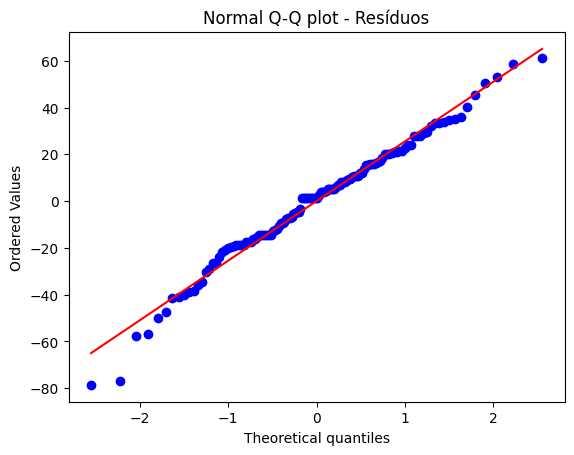

In [24]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

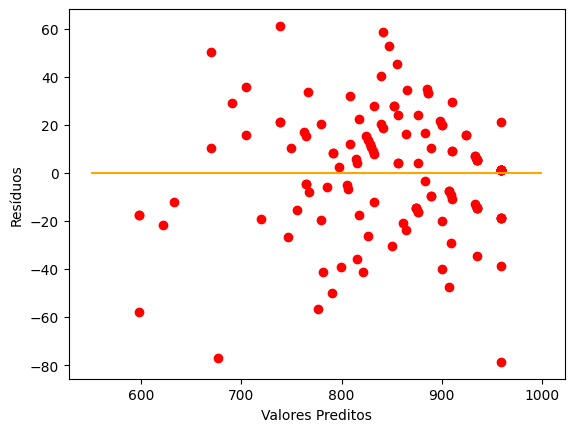

In [25]:
plt.scatter(y=residuos, x=modelo1.predict(), color='red')
plt.hlines(y=0, xmin=550, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [26]:
from statsmodels.compat import lzip

In [27]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo1.resid, modelo1.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 7.939832568694114
p-valor: 0.047271689874476004
f-valor: 2.732037608197022
f_p-valor: 0.04659801474386854


### **Outliers nos resíduos**

(Entre -3 e 3)

In [28]:
outliers = modelo1.outlier_test()

In [29]:
outliers.max()

,0
student_resid,2.466219
unadj_p,0.957876
bonf(p),1.000000


In [30]:
outliers.min()

,0
student_resid,-3.260297
unadj_p,0.001434
bonf(p),0.186452


### **Independência dos resíduos (Durbin-Watson)**
ideal para medidas repetidas (longitudinais: Ex: mesmo aluno)

A estatística de teste é aproximadamente igual a 2 * (1-r) onde r é a autocorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4).

In [31]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning


In [32]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo1.resid)
print('Estatística de teste: {}'.format(estatistica))

Estatística de teste: 2.0810835654651636


### **Ausência de Multicolinearidade**

Quando duas ou mais variáveis independentes estão altamente correlacionadas entre si

Considerada multicolinearidade quando r > 0.9.

In [33]:
variaveis = colegiox[['COMP2','COMP4','COMP5']]

In [34]:
variaveis.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [35]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


### **Análise do Modelo**

Análise do modelo

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [36]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Wed, 14 May 2025   Prob (F-statistic):           3.97e-70
Time:                        20:39:47   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

**Equação:** Nota Redação = 116,1987 + 1,2831.COMP2 + 1,7298.COMP4 + 1,1993.COMP5

In [37]:
# Criando uma coluna com previsão
colegiox['previsao'] = modelo1.fittedvalues

<ipython-input-37-9c81978fff88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo1.fittedvalues


In [38]:
colegiox.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
26911,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,120.0,160.0,160.0,180.0,780.0,Sim,762.822631
43814,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,160.0,160.0,140.0,180.0,800.0,Sim,779.550082
43870,"1,90E+11",São Paulo,17,F,1,preta,2,2,privada,35132287.0,...,Inglês,1.0,140.0,200.0,160.0,180.0,180.0,860.0,Sim,900.067246
44150,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
48417,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,120.0,140.0,120.0,160.0,680.0,Sim,669.642901


In [39]:
import seaborn as sns

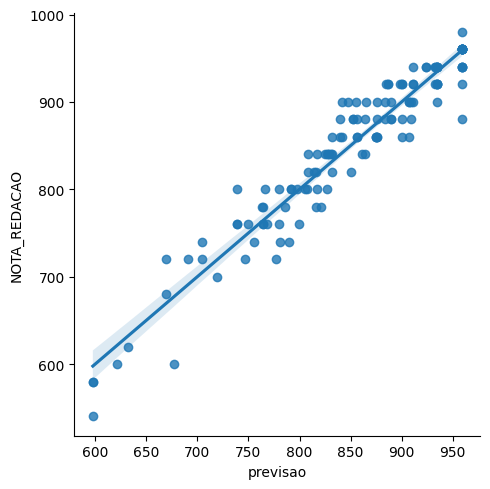

In [40]:
sns.lmplot(x='previsao', y='NOTA_REDACAO', data=colegiox);

## **MODELO 2**

In [41]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [42]:
# Criação do modelo
modelo2 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4', data = colegiox).fit()

In [43]:
residuos2 = modelo2.resid
residuos2

,0
17,-5.800864
10760,-19.726164
13315,-73.382235
20006,-67.154169
26697,20.273836
...,...
426829,46.771131
428241,-69.438183
443242,-52.144793
462446,-118.372859


### Teste de Normalidade dos resíduos

In [44]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [45]:
estatistica, p = stats.shapiro(residuos2)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847788839398657
p-valor: 0.15593487454121718


In [46]:
import matplotlib.pyplot as plt

In [ ]:
stats.probplot(residuos2, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

In [ ]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin=500, xmax=1000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

### **Outliers nos resíduos**

(Entre -3 e 3)

In [ ]:
outliers = modelo2.outlier_test()

In [ ]:
outliers.max()

In [ ]:
outliers.min()

### **Independência dos resíduos (Durbin-Watson)**
ideal para medidas repetidas (longitudinais: Ex: mesmo aluno)

A estatística de teste é aproximadamente igual a 2 * (1-r) onde r é a autocorrelação da amostra dos resíduos. Assim, para r = 0, a estatística de teste é igual a 2, indicando independência dos resíduos (o resultado vai de 0 a 4).

In [ ]:
import statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning


In [ ]:
estatistica = statsmodels.stats.stattools.durbin_watson(modelo2.resid)
print('Estatística de teste: {}'.format(estatistica))

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [ ]:
variaveis2 = colegiox[['COMP2','COMP4']]

In [ ]:
variaveis2.head()

In [ ]:
correlacoes = variaveis2.corr(method='pearson')
correlacoes

### **Análise do Modelo**

Análise do modelo

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [ ]:
print(modelo2.summary())

**Equação:** Nota Redação = 214,0062 + 1,4391.COMP2 + 2,1895.COMP4

In [ ]:
# Criando uma coluna com previsão
colegiox['previsao2'] = modelo2.fittedvalues

In [ ]:
colegiox.head()

### **COMPARAÇÃO ENTRE MODELOS**

**Critério de Informação de Akaike (AIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [ ]:
modelo1.aic

In [ ]:
modelo2.aic

**Critério de Informação Bayesiano (BIC)**

O melhor modelo é com resultado menor (menor variação dos resíduos)

In [ ]:
modelo1.bic

In [ ]:
modelo2.bic

**Coeficiente de determinação (R^2)**

In [ ]:
modelo1.rsquared_adj

In [ ]:
modelo2.rsquared_adj

## **REGRESSÃO MÚLTIPLA COM SCIKIT-LEARN**

## **MODELO 3**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
independente = colegiox[['COMP2','COMP4','COMP5']]


In [ ]:
dependente = colegiox[['NOTA_REDACAO']]

In [ ]:
modelo3 = LinearRegression()
modelo3.fit(independente, dependente)

In [ ]:
modelo3.intercept_

In [ ]:
modelo3.coef_

In [ ]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + {:.2f}*COMP5".format(modelo3.intercept_[0], modelo3.coef_[0][0], modelo3.coef_[0][1], modelo3.coef_[0][2]))

In [ ]:
modelo3.score(independente, dependente)

**PREVISÃO COM DADOS NOVOS**

In [ ]:
novo = np.array([120,200,150]).reshape(-1,3)
novo

In [ ]:
previsao = modelo3.predict(novo)
previsao

## **MODELO 4**

In [ ]:
independente2 = colegiox[['COMP2','COMP4']]


In [ ]:
dependente2 = colegiox[['NOTA_REDACAO']]

In [ ]:
modelo4 = LinearRegression()
modelo4.fit(independente2, dependente2)

In [ ]:
modelo4.intercept_

In [ ]:
modelo4.coef_

In [ ]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4".format(modelo4.intercept_[0], modelo4.coef_[0][0], modelo4.coef_[0][1]))

In [ ]:
modelo4.score(independente2, dependente2)

**PREVISÃO COM DADOS NOVOS**

In [ ]:
novo = np.array([120,200]).reshape(-1,2)
novo

In [ ]:
previsao = modelo4.predict(novo)
previsao